In [ ]:
# importing necessary libraries
%pip install seaborn
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import classification_report

from sklearn.preprocessing import MinMaxScaler
import joblib

In [ ]:
# Load the dataset (update the filename accordingly)
df = pd.read_csv("irrigation_machine.csv")


In [ ]:
# first 5 rows to be printed, df.tail()
df.head()

In [ ]:
df.info()

In [56]:
df.columns

Index(['sensor_0', 'sensor_1', 'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5',
       'sensor_6', 'sensor_7', 'sensor_8', 'sensor_9', 'sensor_10',
       'sensor_11', 'sensor_12', 'sensor_13', 'sensor_14', 'sensor_15',
       'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19', 'parcel_0',
       'parcel_1', 'parcel_2'],
      dtype='object')

In [55]:
df = df.drop('Unnamed: 0', axis=1)
df.head()

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,...,8.0,1.0,0.0,2.0,1.0,9.0,2.0,0,1,0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,...,4.0,5.0,5.0,2.0,2.0,2.0,7.0,0,0,0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,...,3.0,3.0,1.0,0.0,3.0,1.0,0.0,1,1,0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,...,4.0,1.0,1.0,4.0,1.0,3.0,2.0,0,0,0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,...,1.0,3.0,2.0,2.0,1.0,1.0,0.0,1,1,0


In [54]:
df.describe() # Statistics of the dataset

,Unnamed: 0,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,parcel_0,parcel_1,parcel_2
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.00000,2000.000000,2000.000000
mean,999.500000,1.437000,1.659000,2.654500,2.674500,2.887500,1.411000,3.315500,4.201500,1.214000,...,2.731500,3.416000,1.206500,2.325000,1.729500,2.27450,1.813500,0.63550,0.730500,0.212000
std,577.494589,1.321327,1.338512,1.699286,1.855875,1.816451,1.339394,2.206444,2.280241,1.386782,...,1.774537,1.960578,1.258034,1.715181,1.561265,1.67169,1.469285,0.48141,0.443811,0.408827
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000
25%,499.750000,0.000000,1.000000,1.000000,1.000000,2.000000,0.000000,2.000000,3.000000,0.000000,...,1.000000,2.000000,0.000000,1.000000,0.000000,1.00000,1.000000,0.00000,0.000000,0.000000
50%,999.500000,1.000000,1.000000,2.000000,2.000000,3.000000,1.000000,3.000000,4.000000,1.000000,...,2.000000,3.000000,1.000000,2.000000,1.000000,2.00000,2.000000,1.00000,1.000000,0.000000
75%,1499.250000,2.000000,2.000000,4.000000,4.000000,4.000000,2.000000,5.000000,6.000000,2.000000,...,4.000000,5.000000,2.000000,3.000000,3.000000,3.00000,3.000000,1.00000,1.000000,0.000000
max,1999.000000,8.000000,9.000000,10.000000,11.000000,12.000000,7.000000,13.000000,12.000000,8.000000,...,11.000000,11.000000,6.000000,10.000000,11.000000,10.00000,7.000000,1.00000,1.000000,1.000000


In [53]:
# -------------------------------
# STEP 2: DEFINE FEATURES AND LABELS
# -------------------------------

X = df.iloc[:, 0:20]   # This gives you columns 0 to 19 (sensor_0 to sensor_19)


y = df.iloc[:, 20:]

In [52]:
X.sample(10)

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19
36,2.0,1.0,1.0,4.0,3.0,2.0,1.0,3.0,5.0,2.0,6.0,1.0,0.0,4.0,1.0,1.0,3.0,2.0,4.0,2.0
128,1.0,1.0,0.0,3.0,4.0,0.0,5.0,3.0,2.0,2.0,5.0,2.0,4.0,3.0,4.0,2.0,0.0,2.0,7.0,1.0
412,2.0,3.0,2.0,2.0,4.0,3.0,1.0,3.0,2.0,1.0,1.0,1.0,1.0,3.0,3.0,2.0,2.0,3.0,1.0,4.0
1730,5.0,2.0,1.0,3.0,5.0,2.0,3.0,2.0,2.0,2.0,2.0,2.0,1.0,3.0,2.0,0.0,5.0,3.0,4.0,5.0
1331,2.0,2.0,1.0,1.0,5.0,2.0,5.0,8.0,0.0,1.0,1.0,5.0,4.0,2.0,1.0,0.0,3.0,6.0,0.0,1.0
46,1.0,1.0,0.0,2.0,3.0,3.0,4.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,0.0,0.0,0.0,1.0,3.0,0.0
1011,2.0,1.0,2.0,4.0,5.0,0.0,1.0,4.0,1.0,2.0,4.0,3.0,6.0,2.0,4.0,0.0,0.0,0.0,6.0,2.0
866,0.0,2.0,2.0,9.0,3.0,0.0,1.0,7.0,0.0,3.0,2.0,3.0,4.0,4.0,5.0,1.0,1.0,2.0,1.0,1.0
485,0.0,1.0,3.0,5.0,1.0,0.0,3.0,5.0,0.0,2.0,5.0,2.0,7.0,4.0,6.0,1.0,0.0,0.0,4.0,1.0
861,5.0,3.0,0.0,2.0,1.0,0.0,1.0,1.0,6.0,1.0,1.0,2.0,2.0,2.0,1.0,6.0,1.0,1.0,2.0,3.0


In [51]:
y.sample(10)

,parcel_0,parcel_1,parcel_2
938,1,1,0
1409,1,0,0
404,0,1,0
1630,0,1,0
1470,1,1,0
459,0,1,0
1583,1,1,0
796,1,1,1
1999,1,1,1
428,1,1,1


In [44]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 20 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sensor_0   2000 non-null   float64
 1   sensor_1   2000 non-null   float64
 2   sensor_2   2000 non-null   float64
 3   sensor_3   2000 non-null   float64
 4   sensor_4   2000 non-null   float64
 5   sensor_5   2000 non-null   float64
 6   sensor_6   2000 non-null   float64
 7   sensor_7   2000 non-null   float64
 8   sensor_8   2000 non-null   float64
 9   sensor_9   2000 non-null   float64
 10  sensor_10  2000 non-null   float64
 11  sensor_11  2000 non-null   float64
 12  sensor_12  2000 non-null   float64
 13  sensor_13  2000 non-null   float64
 14  sensor_14  2000 non-null   float64
 15  sensor_15  2000 non-null   float64
 16  sensor_16  2000 non-null   float64
 17  sensor_17  2000 non-null   float64
 18  sensor_18  2000 non-null   float64
 19  sensor_19  2000 non-null   float64
dtypes: float

In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   parcel_0  2000 non-null   int64
 1   parcel_1  2000 non-null   int64
 2   parcel_2  2000 non-null   int64
dtypes: int64(3)
memory usage: 47.0 KB


In [42]:
X

,sensor_0,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19
0,1.0,2.0,1.0,7.0,0.0,1.0,1.0,4.0,0.0,3.0,1.0,3.0,6.0,8.0,1.0,0.0,2.0,1.0,9.0,2.0
1,5.0,1.0,3.0,5.0,2.0,2.0,1.0,2.0,3.0,1.0,3.0,2.0,2.0,4.0,5.0,5.0,2.0,2.0,2.0,7.0
2,3.0,1.0,4.0,3.0,4.0,0.0,1.0,6.0,0.0,2.0,3.0,2.0,4.0,3.0,3.0,1.0,0.0,3.0,1.0,0.0
3,2.0,2.0,4.0,3.0,5.0,0.0,3.0,2.0,2.0,5.0,3.0,1.0,2.0,4.0,1.0,1.0,4.0,1.0,3.0,2.0
4,4.0,3.0,3.0,2.0,5.0,1.0,3.0,1.0,1.0,2.0,4.0,5.0,3.0,1.0,3.0,2.0,2.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4.0,1.0,2.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,3.0,3.0,1.0,2.0,3.0,2.0,1.0,1.0,0.0
1996,1.0,3.0,3.0,3.0,2.0,2.0,3.0,3.0,1.0,5.0,2.0,2.0,4.0,3.0,3.0,0.0,1.0,0.0,6.0,2.0
1997,1.0,3.0,3.0,1.0,1.0,4.0,8.0,1.0,0.0,0.0,3.0,2.0,4.0,2.0,3.0,4.0,4.0,4.0,1.0,0.0
1998,2.0,1.0,0.0,2.0,2.0,0.0,1.0,3.0,0.0,0.0,0.0,5.0,2.0,2.0,4.0,0.0,2.0,0.0,3.0,0.0


In [41]:
X.shape, y.shape

((2000, 20), (2000, 3))

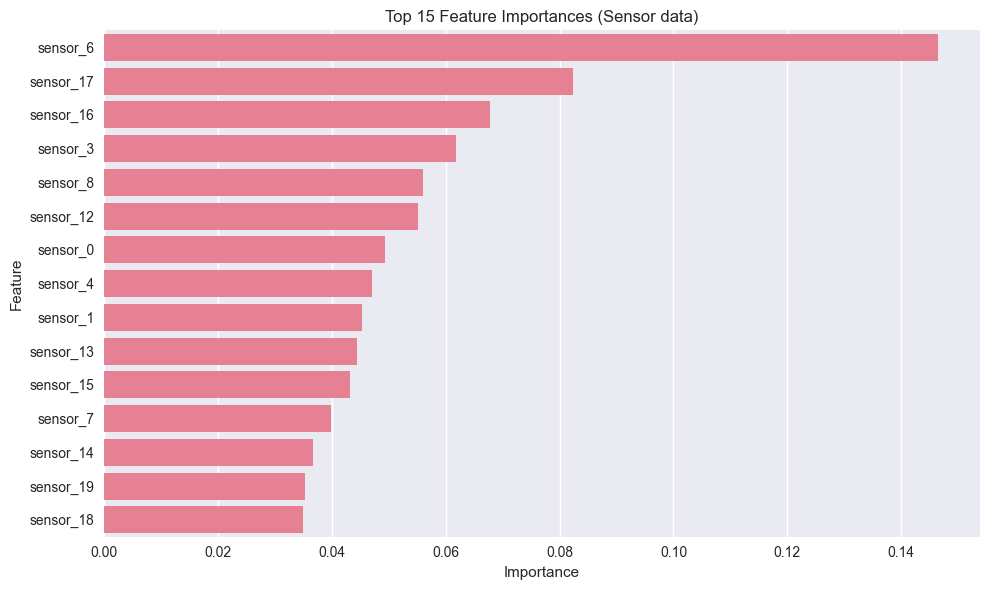

In [ ]:
# Fitting the MultiOutputClassifier with RandomForestClassifier 
model = MultiOutputClassifier(RandomForestClassifier(random_state=42))
model.fit(X, y)

importances = model.estimators_[0].feature_importances_
feature_names = X.columns

feat_df = pd.DataFrame({"Feature": feature_names, "Importance": importances})
feat_df = feat_df.sort_values("Importance", ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=feat_df.head(15))
plt.title("Top 15 Feature Importances (Sensor data)")
plt.tight_layout()
plt.show()


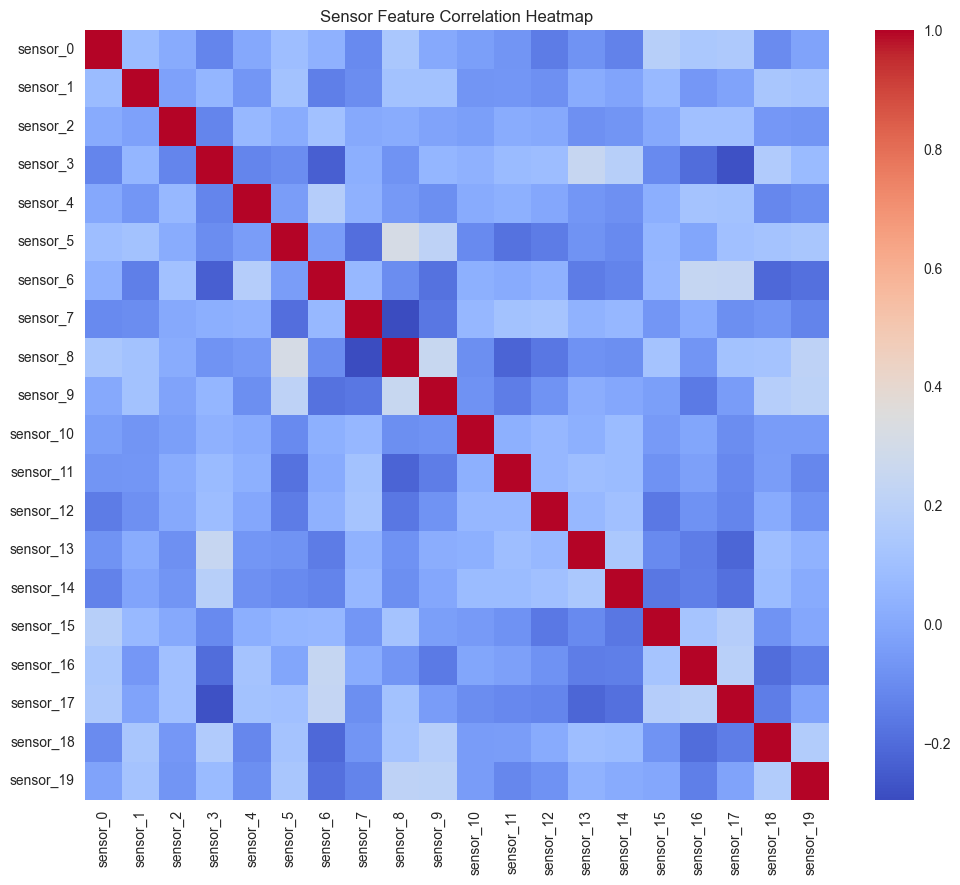

In [50]:
plt.figure(figsize=(12, 10))
sns.heatmap(X.corr(), cmap="coolwarm", annot=False)
plt.title("Sensor Feature Correlation Heatmap")
plt.show()
